<a href="https://colab.research.google.com/github/TatsianaVladykina/TMS_final/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Анализ настроений отзывов и определение эмоций в отзывах
(Spotify Reviews Sentiment Analysis and identifying the emotions in reviews)


1. Predictive Modelling with Machine Learning
(Logistic regression, Multinomial Naive Bayes, SVM, Random Forest)
using Bag of words and Term Frequency-Inverse Document Frequency (TFIDF)

2. Review classification using pretrained model HuggingFace

3. Identifying the emotions in reviews using HuggingFace model

Dataset: https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022

 Plan:

 1. Importing Libraries.

 2. Data extraction, cleaning and analysis.

 (Text Preprocessing : Lowercase, Remove punctuations, Stopword Removal, Lemmatize. Modifying df, plots).

 3. Predictive Modelling using Machine Learning.

 (Preparation: train_val_test_split, Bags of words model, TFIDF model.)

  3.1 Logistic regression
  3.2 Multinomial Naive Bayes
  3.3 Model SVM
  3.4 Random Forest
  3.5 Results

 4. Review classification using pretrained model HuggingFace
 5. Identifying the emotions in reviews using HuggingFace model

#1. Importing Libraries

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install scikit-plot

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.6 MB/s eta 0:00:00


In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import scipy
import re
import string
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import pandas as pd
import numpy as np
import os
import random
from pathlib import Path
import json

import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

#2. Data extraction, cleaning and analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# загрузка файла
data = pd.read_csv('drive/MyDrive/DS/reviews.csv')
print(data.shape)

Mounted at /content/drive
(61594, 5)


In [ ]:
# вывод данных в формате таблицы
data.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
data.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

In [ ]:
# Выберем только необходимые столбцы в новый датасет
new_df = data[['Review', 'Rating']]

In [ ]:
new_df.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


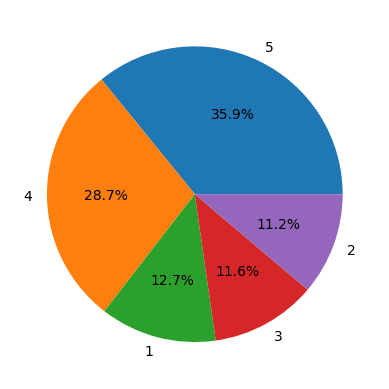

In [ ]:
#Построение круговой диаграммы по рейтингу от одного до пяти
plt.pie(new_df['Rating'].value_counts(), labels=data['Rating'].unique(), autopct='%1.1f%%')
plt.show()

In [ ]:
import plotly.express as px
# count of ratings
fig = px.histogram(new_df,
             x = 'Rating',
             title = 'Histogram of Review Rating',
             template = 'ggplot2',
             color = 'Rating',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [ ]:
#изменение значений в столбце рейтинг на негативное, нейтральное, позитивное
replace_dict = {'Rating': {1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}}
new_df2 = new_df.replace(replace_dict)

In [ ]:
new_df2.head()

,Review,Rating
0,"Great music service, the audio is high quality...",positive
1,Please ignore previous negative rating. This a...,positive
2,"This pop-up ""Get the best Spotify experience o...",positive
3,Really buggy and terrible to use as of recently,negative
4,Dear Spotify why do I get songs that I didn't ...,negative


In [ ]:
new_df2['Rating'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

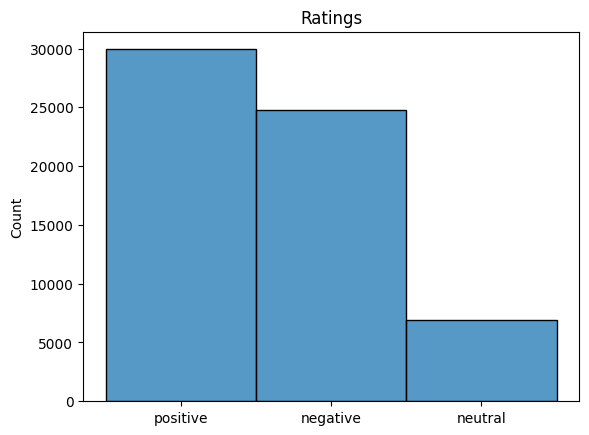

In [ ]:
sns.histplot(new_df2['Rating'])
plt.title('Ratings')
plt.xlabel('')
plt.show()

In [ ]:
#sentiment count
new_df2['Rating'].value_counts()

positive    29937
negative    24771
neutral      6886
Name: Rating, dtype: int64

In [ ]:
#ввод дополнительного параметра "длина отзыва"

new_df2['Review_length'] = new_df2['Review'].apply(len)
print(new_df2.shape)
new_df2.head()

(61594, 3)


,Review,Rating,Review_length
0,"Great music service, the audio is high quality...",positive,112
1,Please ignore previous negative rating. This a...,positive,86
2,"This pop-up ""Get the best Spotify experience o...",positive,106
3,Really buggy and terrible to use as of recently,negative,47
4,Dear Spotify why do I get songs that I didn't ...,negative,100


In [ ]:
new_df2['Review_length'].describe()

count    61594.000000
mean       163.323457
std        119.940997
min         10.000000
25%         72.000000
50%        130.000000
75%        221.000000
max       3753.000000
Name: Review_length, dtype: float64

<ipython-input-21-553f3c9246f6>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Review_length', ylabel='Density'>

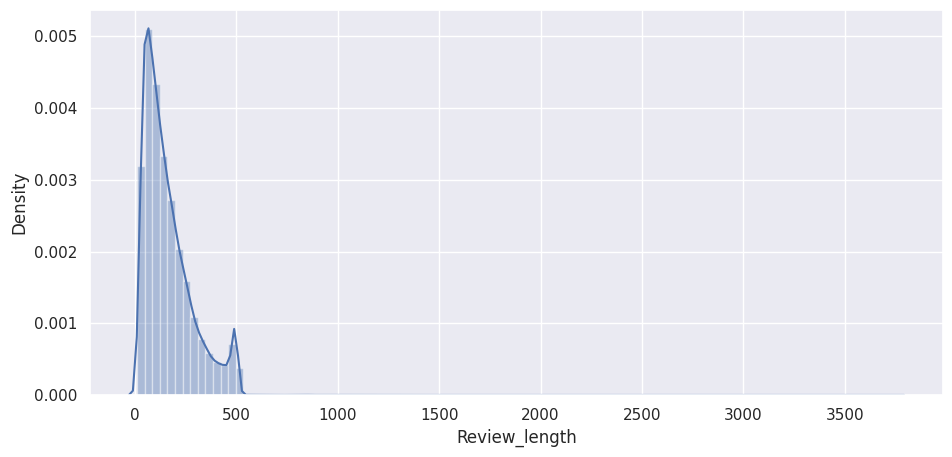

In [ ]:
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(new_df2['Review_length'] ,hist=True, bins=100)
#Этот график отображает распределение длины отзывов в датафрейме new_df2.
#Ось X представляет собой длину отзыва, а ось Y - плотность распределения

In [ ]:
from textblob.en import positive
df_negative = new_df2[new_df2['Rating']=='negative']
df_neutral = new_df2[new_df2['Rating']=='neutral']
df_positive = new_df2[new_df2['Rating']=='positive']

<ipython-input-23-e999b0452c03>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-23-e999b0452c03>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-23-e999b0452c03>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




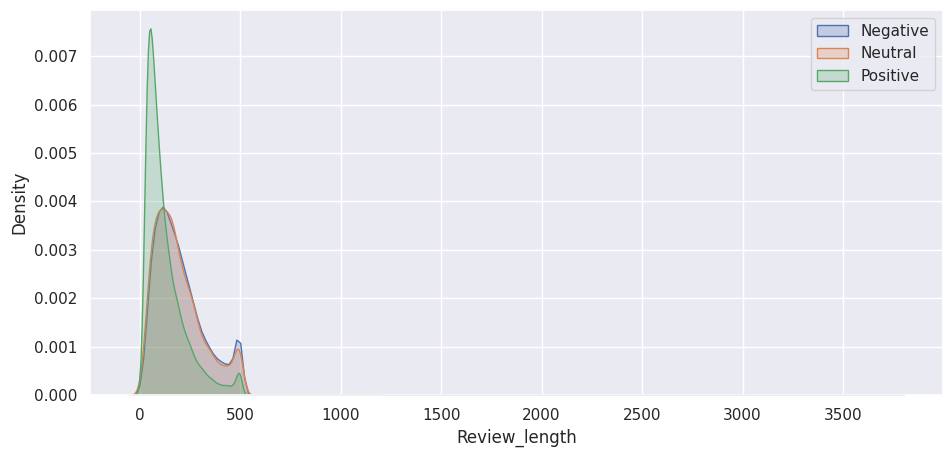

In [ ]:
sns.kdeplot(df_negative['Review_length'], shade=True, label='Negative')
sns.kdeplot(df_neutral['Review_length'], shade=True, label='Neutral')
sns.kdeplot(df_positive['Review_length'], shade=True, label='Positive')
plt.legend()
plt.show()
#Этот график отображает распределение длины отзывов в датафрейме df_negative, df_neutral и df_positive.
#Ось X представляет собой длину отзыва, а ось Y - плотность распределения.

Text Preprocessing - это процесс подготовки текстовых данных к анализу:

1. Lowercase - приведение всех символов к нижнему регистру, чтобы уменьшить размер словаря и устранить различия между словами, которые отличаются только регистром (например, “Google” и “google”).

2. Remove punctuations - удаление знаков препинания, которые не несут смысловой нагрузки и могут мешать анализу текста (например, запятые, точки, скобки).

3. Stopword Removal - удаление часто встречающихся слов, которые не несут смысловой нагрузки и могут мешать анализу текста (например, артикли, союзы, предлоги).

4. Lemmatize - приведение слов к их нормальной форме (лемме), чтобы устранить различия между формами одного и того же слова (например, “бегут” и “бежал” к “бежать”).

5. Tokenize - разбиение текста на отдельные единицы (токены), которые могут быть словами, символами или фразами. Токенизация позволяет обрабатывать текст как последовательность токенов, а не как целый блок.

In [ ]:
# Lowercase
new_df2.loc[:,'Review'] = new_df2.loc[:,'Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
new_df2.head(10)

,Review,Rating,Review_length
0,"great music service, the audio is high quality...",positive,112
1,please ignore previous negative rating. this a...,positive,86
2,"this pop-up ""get the best spotify experience o...",positive,106
3,really buggy and terrible to use as of recently,negative,47
4,dear spotify why do i get songs that i didn't ...,negative,100
5,the player controls sometimes disappear for no...,neutral,114
6,i love the selection and the lyrics are provid...,positive,83
7,still extremely slow when changing storage to ...,neutral,352
8,it's a great app and the best mp3 music app i ...,positive,210
9,"i'm deleting this app, for the following reaso...",negative,443


In [ ]:
# Remove punctuations
import re
new_df2.loc[:,'Review'] = new_df2.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))
new_df2.head(10)

,Review,Rating,Review_length
0,great music service the audio is high quality ...,positive,112
1,please ignore previous negative rating this ap...,positive,86
2,this pop-up get the best spotify experience on...,positive,106
3,really buggy and terrible to use as of recently,negative,47
4,dear spotify why do i get songs that i didnt p...,negative,100
5,the player controls sometimes disappear for no...,neutral,114
6,i love the selection and the lyrics are provid...,positive,83
7,still extremely slow when changing storage to ...,neutral,352
8,its a great app and the best mp3 music app i h...,positive,210
9,im deleting this app for the following reasons...,negative,443


In [ ]:
# Stopword Removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_words = stopwords.words('english')
new_df2.loc[:,'Review'] = new_df2.loc[:,'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))
new_df2.head(10)

,Review,Rating,Review_length
0,great music service audio high quality app eas...,positive,112
1,please ignore previous negative rating app sup...,positive,86
2,pop-up get best spotify experience android 12 ...,positive,106
3,really buggy terrible use recently,negative,47
4,dear spotify get songs didnt put playlist shuf...,negative,100
5,player controls sometimes disappear reason app...,neutral,114
6,love selection lyrics provided song youre list...,positive,83
7,still extremely slow changing storage external...,neutral,352
8,great app best mp3 music app ever used one pro...,positive,210
9,im deleting app following reasons app failing ...,negative,443


In [ ]:
# Lemmatize
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmat = WordNetLemmatizer()
new_df2.loc[:,'Review'] = new_df2.loc[:,'Review'].apply(lambda word: " ".join(lemmat.lemmatize(word) for word in word.split()))
new_df2.head(10)

,Review,Rating,Review_length
0,great music service audio high quality app eas...,positive,112
1,please ignore previous negative rating app sup...,positive,86
2,pop-up get best spotify experience android 12 ...,positive,106
3,really buggy terrible use recently,negative,47
4,dear spotify get song didnt put playlist shuff...,negative,100
5,player control sometimes disappear reason app ...,neutral,114
6,love selection lyric provided song youre liste...,positive,83
7,still extremely slow changing storage external...,neutral,352
8,great app best mp3 music app ever used one pro...,positive,210
9,im deleting app following reason app failing b...,negative,443


In [ ]:
# Этот код создает три переменные: pos_words, neg_words и neu_words.
#Каждая переменная содержит все отзывы, соответствующие положительному, отрицательному и нейтральному настроению соответственно.
#Затем каждый список отзывов объединяется в одну строку. В результате получаются три строки, содержащие все слова из всех отзывов каждой категории.
pos_words = []
neg_words = []
neu_words = []

for Review in df_positive.Review:
    pos_words.append(Review)
pos_words = ' '.join(pos_words)

for Review in df_negative.Review:
    neg_words.append(Review)
neg_words = ' '.join(neg_words)

for Review in df_neutral.Review:
    neu_words.append(Review)
neu_words = ' '.join(neu_words)

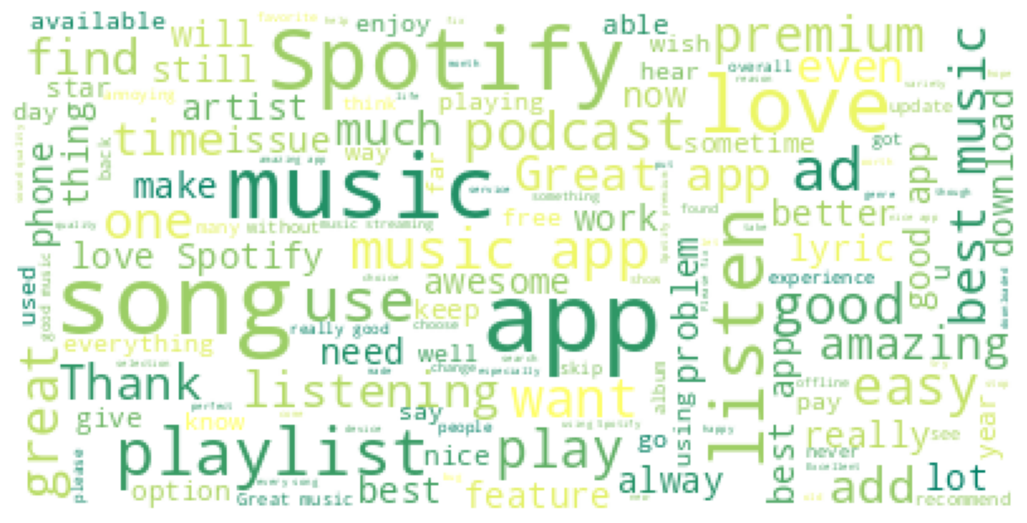

In [ ]:
# Этот код создает облако слов на основе списка слов pos_words.
# Облако слов представляет собой графическое изображение, в котором размер каждого слова пропорционален его частоте в списке.
# Чем чаще слово встречается в списке, тем оно больше.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=len(pos_words), max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words) #colormap: summer, gist_heat, viridis, coolwarm, cubehelix, magma

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

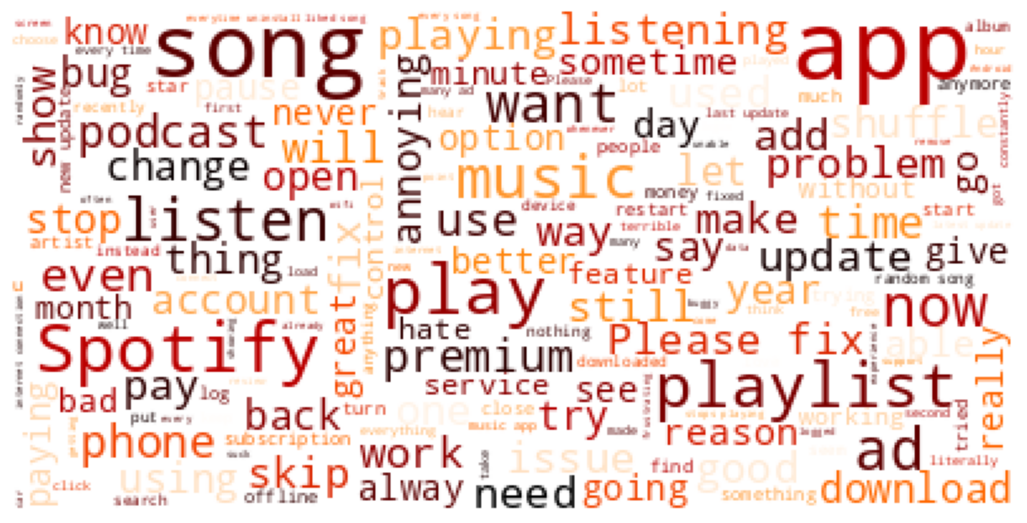

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=len(pos_words), max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

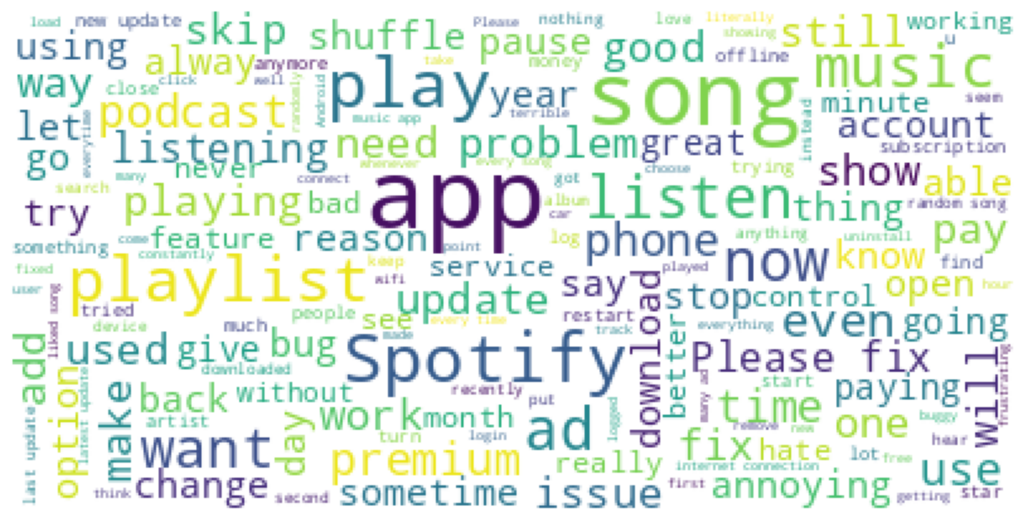

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=len(neu_words), max_font_size=40, relative_scaling=.5, colormap='viridis').generate(neg_words)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Этот код создает график, который показывает наиболее часто встречающиеся слова в отзывах.
# Слова отсортированы по частоте использования, и на графике они представлены в порядке убывания.
# Каждое слово представлено горизонтальной полосой, длина которой пропорциональна количеству упоминаний этого слова в отзывах.

from collections import Counter
#most common words
texts = new_df2['Review']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:15]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

In [ ]:
# создание нового df_for_sensitive для использования в ML и моделях HuggingFace

df_for_sensitive = new_df2

#3. Predictive Modelling using Machine Learning

Feature Engineering. Spliting the training dataset.

Разделение набора данных на три части: обучающая (60%), проверочная (20%) и тестовая (20%). Сначала набор данных разделен на обучающий и тестовый наборы с помощью метода train_test_split, а затем разделен обучающий набор на обучающий и проверочный наборы.

In [ ]:
df_for_sensitive['Rating'].value_counts()

positive    29937
negative    24771
neutral      6886
Name: Rating, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_for_sensitive['Review'], df_for_sensitive['Rating'], test_size=0.2, random_state=42)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (36956,)
Validation set shape: (12319,)
Test set shape: (12319,)


Bag of Words и TF-IDF - это два распространенных метода предварительной обработки текстовых данных, которые позволяют преобразовать текст в числовую форму.

Bag of words преобразует текст в векторы фиксированной длины, подсчитывая, сколько раз каждое слово встречается в тексте.

TFIDF работает путем пропорционального увеличения количества раз, когда слово появляется в документе, но это компенсируется количеством документов, в которых оно присутствует.

Bags of words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer object
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# Transform the train set into a bag-of-words representation
cv_train_review = cv.fit_transform(X_train)

# Transform the validation set into a bag-of-words representation
cv_val_review = cv.transform(X_val)

# Transform the test set into a bag-of-words representation
cv_test_review = cv.transform(X_test)

print('BOW_cv_train:', cv_train_review.shape)
print('BOW_cv_val:', cv_val_review.shape)
print('BOW_cv_test:', cv_test_review.shape)

BOW_cv_train: (36956, 579196)
BOW_cv_val: (12319, 579196)
BOW_cv_test: (12319, 579196)


Term Frequency-Inverse Document Frequency model (TFIDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tv = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

# Transform the train set into a TF-IDF representation
tv_train_review = tv.fit_transform(X_train)

# Transform the validation set into a TF-IDF representation
tv_val_review = tv.transform(X_val)

# Transform the test set into a TF-IDF representation
tv_test_review = tv.transform(X_test)

print('Tfidf_train:', tv_train_review.shape)
print('Tfidf_val:', tv_val_review.shape)
print('Tfidf_test:', tv_test_review.shape)

Tfidf_train: (36956, 579196)
Tfidf_val: (12319, 579196)
Tfidf_test: (12319, 579196)


#3.1 Logistic regression

logistic regression model for both bag of words and tfidf features

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
# Создание объекта LogisticRegression
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

# Train the model on the training data
# Обучение модели на тренировочных данных

#Fitting the model for Bag of words
# Обучение модели для Bag of words
lr_bow=lr.fit(cv_train_review,y_train)
print(lr_bow)
# Get the accuracy score on the validation data
# Получение оценки точности на валидационных данных
accuracy = lr.score(cv_val_review, y_val)
print('Accuracy:', accuracy)

#Fitting the model for tfidf features
# Обучение модели для tfidf-функций
lr_tfidf=lr.fit(tv_train_review,y_train)
print(lr_tfidf)
# Get the accuracy score on the validation data
# Получение оценки точности на валидационных данных
accuracy = lr.score(tv_val_review, y_val)
print('Accuracy:', accuracy)



LogisticRegression(C=1, max_iter=500, random_state=42)
Accuracy: 0.5197662147901615
LogisticRegression(C=1, max_iter=500, random_state=42)
Accuracy: 0.5721243607435669


In [ ]:
#Predicting the model for bag of words
# Предсказание модели для Bag of words
lr_bow_predict=lr.predict(cv_test_review)
print(lr_bow_predict)
#Predicting the model for tfidf features
#Предсказание модели для tfidf-функций
lr_tfidf_predict=lr.predict(tv_test_review)
print(lr_tfidf_predict)

['positive' 'positive' 'positive' ... 'positive' 'positive' 'positive']
['positive' 'positive' 'positive' ... 'positive' 'positive' 'positive']


In [ ]:
#Accuracy score for bag of words
#Оценка точности для Bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
#Оценка точности для tfidf-функций
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.6118191411640556
lr_tfidf_score : 0.5699326244013313


“Accuracy” - это показатель точности модели, который определяется как доля правильных ответов, полученных моделью на тестовых данных. Чем выше значение Accuracy, тем лучше модель справляется с задачей.

In [ ]:
#Print the classification report

#Classification report for bag of words
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['positive','neutral','negative'])
print(lr_bow_report)

#Classification report for tfidf featuren
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['positive','neutral','negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    positive       0.66      0.44      0.53      4909
     neutral       0.00      0.00      0.00      1412
    negative       0.59      0.90      0.72      5998

    accuracy                           0.61     12319
   macro avg       0.42      0.45      0.41     12319
weighted avg       0.55      0.61      0.56     12319



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

    positive       0.69      0.27      0.39      4909
     neutral       0.00      0.00      0.00      1412
    negative       0.55      0.95      0.69      5998

    accuracy                           0.57     12319
   macro avg       0.41      0.41      0.36     12319
weighted avg       0.54      0.57      0.49     12319



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



В отчете о классификации (classification report) показатели precision, recall и f1-score являются метриками качества классификации. Precision - это доля правильных положительных ответов относительно общего количества положительных ответов. Recall - это доля правильных положительных ответов относительно общего количества реальных положительных ответов. F1-score - это взвешенное гармоническое среднее между precision и recall. Чем ближе значение F1-score к 1, тем лучше модель.

Confusion matrix

Матрица ошибок (confusion matrix) - это таблица, которая показывает, сколько объектов было классифицировано правильно и сколько неправильно.

In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,lr_bow_predict,labels=['positive','neutral','negative'])
print(cm_bow)

#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,lr_tfidf_predict,labels=['positive','neutral','negative'])
print(cm_tfidf)

[[5388    0  610]
 [ 922    0  490]
 [2755    5 2149]]
[[5680    0  318]
 [1123    0  289]
 [3568    0 1341]]


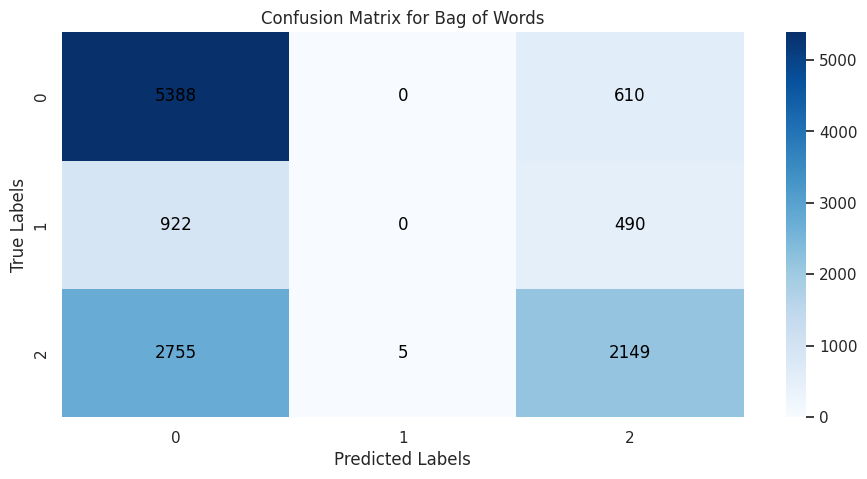

In [ ]:
# Plotting the confusion matrix for bag of words
import seaborn as sns
ax = sns.heatmap(cm_bow, annot=False, cmap='Blues')
ax.set_title('Confusion Matrix for Bag of Words')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
for i in range(len(cm_bow)):
    for j in range(len(cm_bow)):
        ax.text(j+0.5, i+0.5, cm_bow[i][j], ha='center', va='center', color='black')
plt.show()

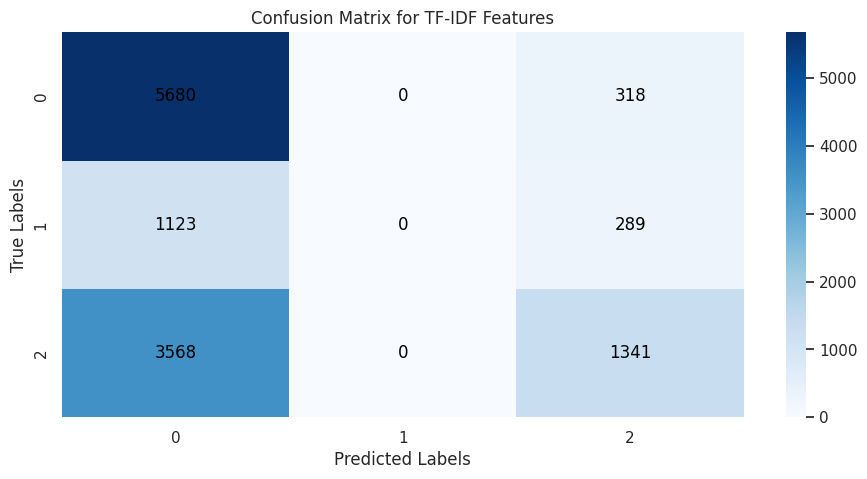

In [ ]:
# Plotting the confusion matrix for tfidf features
ax = sns.heatmap(cm_tfidf, annot=False, cmap='Blues')
ax.set_title('Confusion Matrix for TF-IDF Features')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
for i in range(len(cm_tfidf)):
    for j in range(len(cm_tfidf)):
        ax.text(j+0.5, i+0.5, cm_tfidf[i][j], ha='center', va='center', color='black')
plt.show()

В каждой ячейке матрицы указано количество объектов, которые были предсказаны в соответствующий класс.

In [ ]:
# Предсказание модели для Bag of words
cv_test_text = ['good music']
cv_test_text_transformed = cv.transform(cv_test_text)
lr_bow_predict = lr.predict(cv_test_text_transformed)
print(lr_bow_predict)

#Предсказание модели для tfidf-функций
tv_test_text = ['good music']
tv_test_text_transformed = tv.transform(tv_test_text)
lr_tfidf_predict = lr.predict(tv_test_text_transformed)
print(lr_tfidf_predict)

['positive']
['positive']


In [ ]:
# Предсказание модели для Bag of words
cv_test_text = ['text']
cv_test_text_transformed = cv.transform(cv_test_text)
lr_bow_predict = lr.predict(cv_test_text_transformed)
print(lr_bow_predict)

#Предсказание модели для tfidf-функций
tv_test_text = ['text']
tv_test_text_transformed = tv.transform(tv_test_text)
lr_tfidf_predict = lr.predict(tv_test_text_transformed)
print(lr_tfidf_predict)

['positive']
['positive']


# 3.2 Multinomial Naive Bayes

In [ ]:
#Multinomial Naive Bayes for bag of words and tfidf features

#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_review,y_train)
print(mnb_bow)
#вывод атрибутов объекта
print('MultinomialNB(alpha=%s, class_prior=%s, fit_prior=%s)' % (mnb.alpha, mnb.class_prior, mnb.fit_prior))
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_review,y_train)
print(mnb_tfidf)
#вывод атрибутов объекта
print('MultinomialNB(alpha=%s, class_prior=%s, fit_prior=%s)' % (mnb.alpha, mnb.class_prior, mnb.fit_prior))

MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_review)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_review)
print(mnb_tfidf_predict)

['positive' 'positive' 'positive' ... 'positive' 'positive' 'positive']
['positive' 'positive' 'positive' ... 'positive' 'positive' 'positive']


In [ ]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.6133614741456287
mnb_tfidf_score : 0.5899829531617826


In [ ]:
#Classification report for bag of words
mnb_bow_report=classification_report(y_test,mnb_bow_predict,labels=['positive','neutral','negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(y_test,mnb_tfidf_predict,labels=['positive','neutral','negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    positive       0.60      0.88      0.71      5998
     neutral       0.00      0.00      0.00      1412
    negative       0.65      0.46      0.54      4909

    accuracy                           0.61     12319
   macro avg       0.42      0.45      0.42     12319
weighted avg       0.55      0.61      0.56     12319

              precision    recall  f1-score   support

    positive       0.57      0.91      0.70      5998
     neutral       0.00      0.00      0.00      1412
    negative       0.67      0.36      0.47      4909

    accuracy                           0.59     12319
   macro avg       0.41      0.43      0.39     12319
weighted avg       0.54      0.59      0.53     12319



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,mnb_bow_predict,labels=['positive','neutral','negative'])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,mnb_tfidf_predict,labels=['positive','neutral','negative'])
print(cm_tfidf)

[[5291    0  707]
 [ 897    0  515]
 [2640    4 2265]]
[[5477    0  521]
 [1032    0  380]
 [3118    0 1791]]


In [ ]:
# Предсказание модели для Bag of words
cv_test_text = ['text']
cv_test_text_transformed = cv.transform(cv_test_text)
mnb_bow_predict = mnb.predict(cv_test_text_transformed)
print(mnb_bow_predict)

#Предсказание модели для tfidf-функций
tv_test_text = ['text']
tv_test_text_transformed = tv.transform(tv_test_text)
mnb_tfidf_predict = mnb.predict(tv_test_text_transformed)
print(mnb_tfidf_predict)

['positive']
['positive']


# 3.3 Model SVM

In [ ]:
# Model SVM
from sklearn.svm import SVC
svc_model = SVC(C=1.0,
             kernel='linear',
             class_weight='balanced',
             probability=True,
             random_state=111)

# Train the model on the training data
# Обучение модели на тренировочных данных

#Fitting the model for Bag of words
# Обучение модели для Bag of words
svc_bow = svc_model.fit(cv_train_review,y_train)
print(svc_bow)
# Get the accuracy score on the validation data
# Получение оценки точности на валидационных данных
accuracy = svc_model.score(cv_val_review, y_val)
print('Accuracy:', accuracy)

#Fitting the model for tfidf features
# Обучение модели для tfidf-функций
svc_tfidf=svc_model.fit(tv_train_review,y_train)
print(svc_tfidf)
# Get the accuracy score on the validation data
# Получение оценки точности на валидационных данных
accuracy = svc_model.score(tv_val_review, y_val)
print('Accuracy:', accuracy)

SVC(class_weight='balanced', kernel='linear', probability=True,
    random_state=111)
Accuracy: 0.5128663040831236
SVC(class_weight='balanced', kernel='linear', probability=True,
    random_state=111)
Accuracy: 0.500202938550207


In [ ]:
#Predicting the model for bag of words
svc_bow_predict=svc_bow.predict(cv_test_review)
print(svc_bow_predict)
#Predicting the model for tfidf features
svc_tfidf_predict=svc_tfidf.predict(tv_test_review)
print(svc_tfidf_predict)

['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']
['negative' 'positive' 'negative' ... 'positive' 'negative' 'negative']


In [ ]:
#Accuracy score for bag of words
svc_bow_score=accuracy_score(y_test,svc_bow_predict)
print("svc_bow_score :",svc_bow_score)
#Accuracy score for tfidf features
svc_tfidf_score=accuracy_score(y_test,svc_tfidf_predict)
print("svc_tfidf_score :",svc_tfidf_score)

svc_bow_score : 0.49557593960548746
svc_tfidf_score : 0.49622534296614984


In [ ]:
#Classification report for bag of words
svc_bow_report=classification_report(y_test,svc_bow_predict,labels=['positive','neutral','negative'])
print(svc_bow_report)
#Classification report for tfidf features
svc_tfidf_report=classification_report(y_test,svc_tfidf_predict,labels=['positive','neutral','negative'])
print(svc_tfidf_report)

              precision    recall  f1-score   support

    positive       0.75      0.29      0.42      5998
     neutral       0.19      0.06      0.09      1412
    negative       0.45      0.87      0.59      4909

    accuracy                           0.50     12319
   macro avg       0.46      0.41      0.37     12319
weighted avg       0.56      0.50      0.45     12319

              precision    recall  f1-score   support

    positive       0.80      0.25      0.38      5998
     neutral       0.13      0.01      0.01      1412
    negative       0.44      0.94      0.60      4909

    accuracy                           0.50     12319
   macro avg       0.46      0.40      0.33     12319
weighted avg       0.58      0.50      0.43     12319



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,svc_bow_predict,labels=['positive','neutral','negative'])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,svc_tfidf_predict,labels=['positive','neutral','negative'])
print(cm_tfidf)

[[1764  121 4113]
 [ 179   79 1154]
 [ 420  227 4262]]
[[1504   23 4471]
 [ 121   11 1280]
 [ 263   48 4598]]


# 3.4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest - Count Vectors

rf_model = RandomForestClassifier()

#Fitting the model for Bag of words
# Обучение модели для Bag of words
rf_bow = rf_model.fit(cv_train_review,y_train)
print(rf_bow)
# Get the accuracy score on the validation data
# Получение оценки точности на валидационных данных
accuracy = rf_model.score(cv_val_review, y_val)
print('Accuracy:', accuracy)

#Fitting the model for tfidf features
# Обучение модели для tfidf-функций
rf_tfidf=rf_model.fit(tv_train_review,y_train)
print(rf_tfidf)
# Get the accuracy score on the validation data
# Получение оценки точности на валидационных данных
accuracy = rf_model.score(tv_val_review, y_val)
print('Accuracy:', accuracy)

RandomForestClassifier()
Accuracy: 0.49525123792515624
RandomForestClassifier()
Accuracy: 0.4938712557837487


In [ ]:
#Predicting the model for bag of words
rf_bow_predict=rf_bow.predict(cv_test_review)
print(rf_bow_predict)
#Predicting the model for tfidf features
rf_tfidf_predict=rf_tfidf.predict(tv_test_review)
print(rf_tfidf_predict)

['positive' 'positive' 'positive' ... 'positive' 'positive' 'positive']
['positive' 'positive' 'positive' ... 'positive' 'positive' 'positive']


In [ ]:
#Accuracy score for bag of words
rf_bow_score=accuracy_score(y_test,rf_bow_predict)
print("rf_bow_score :", rf_bow_score)
#Accuracy score for tfidf features
rf_tfidf_score=accuracy_score(y_test,rf_tfidf_predict)
print("rf_tfidf_score :", rf_tfidf_score)

rf_bow_score : 0.48940660767919475
rf_tfidf_score : 0.48883837973861516


In [ ]:
#Classification report for bag of words
rf_bow_report=classification_report(y_test,rf_bow_predict,labels=['positive','neutral','negative'])
print(rf_bow_report)
#Classification report for tfidf features
rf_tfidf_report=classification_report(y_test,rf_tfidf_predict,labels=['positive','neutral','negative'])
print(rf_tfidf_report)

              precision    recall  f1-score   support

    positive       0.49      1.00      0.66      5998
     neutral       0.19      0.00      0.00      1412
    negative       0.57      0.01      0.02      4909

    accuracy                           0.49     12319
   macro avg       0.41      0.34      0.23     12319
weighted avg       0.49      0.49      0.33     12319

              precision    recall  f1-score   support

    positive       0.49      1.00      0.66      5998
     neutral       0.25      0.00      0.00      1412
    negative       0.56      0.01      0.02      4909

    accuracy                           0.49     12319
   macro avg       0.43      0.34      0.23     12319
weighted avg       0.49      0.49      0.33     12319



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,rf_bow_predict,labels=['positive','neutral','negative'])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,rf_tfidf_predict,labels=['positive','neutral','negative'])
print(cm_tfidf)

[[5971    6   21]
 [1388    3   21]
 [4847    7   55]]
[[5979    2   17]
 [1395    2   15]
 [4864    4   41]]


# 3.5 Results

In [ ]:
#Model Results
model = {'Model':['Logistic Regression','Multinomial Naive Bayes', 'SVM', 'Random Forest Classifier'],
         'Score BOW':[lr_bow_score, mnb_bow_score, svc_bow_score, rf_bow_score],
         'Score TFIDF':[lr_tfidf_score, mnb_tfidf_score, svc_tfidf_score, rf_tfidf_score]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Score BOW,Score TFIDF
0,Logistic Regression,0.611819,0.569933
1,Multinomial Naive Bayes,0.613361,0.589983
2,SVM,0.495576,0.496225
3,Random Forest Classifier,0.489407,0.488838


Таким образом, наилучшие коэффициенты - 0,61 - это  Logistic Regression  и Multinomial Naive Bayes

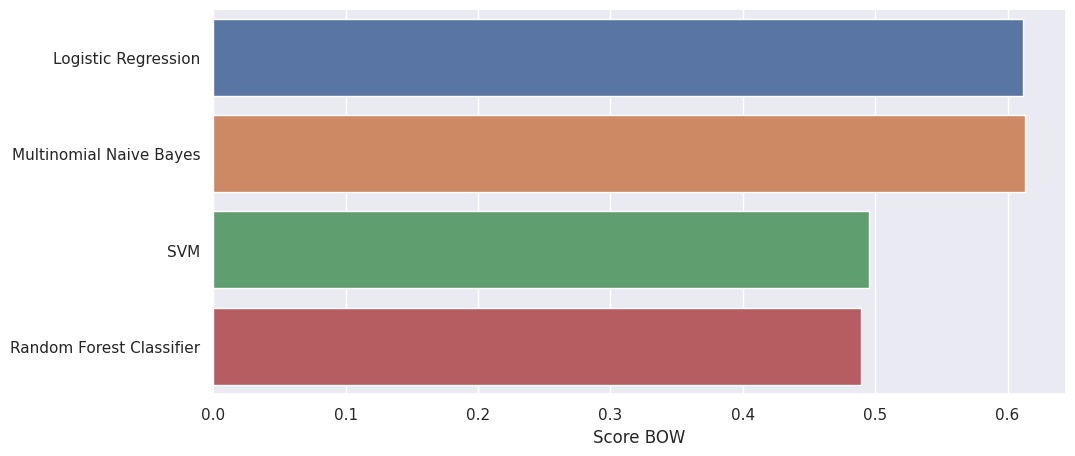

In [ ]:
sns.barplot(data=model_df, y='Model', x='Score BOW')
plt.ylabel('')
plt.show()

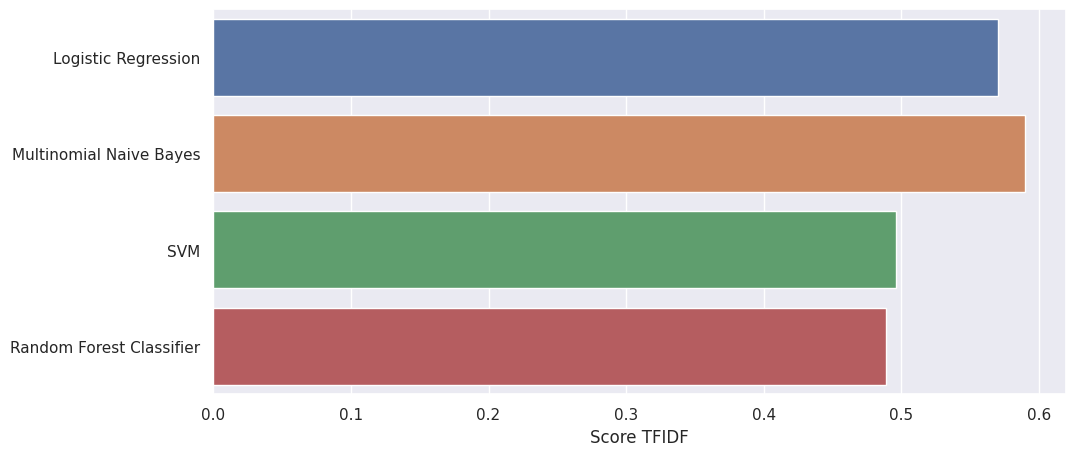

In [ ]:
sns.barplot(data=model_df, y='Model', x='Score TFIDF')
plt.ylabel('')
plt.show()

Далее буде рассмотрен прогноз (и сравнение с данными первоначального датасета) отзывов

In [ ]:
print(data.loc[137])

Time_submitted                                  2022-07-09 06:03:53
Review            It's a amazing app but if it has been an optio...
Rating                                                            4
Total_thumbsup                                                    0
Reply                                                           NaN
Name: 137, dtype: object


In [ ]:
print(data.loc[137]['Review'])

It's a amazing app but if it has been an option to download songs it's completely fantasy


In [ ]:
# прогноз для Logistic regression   BOW

import pandas as pd
import numpy as np
import re

text = "It's a amazing app but if it has been an option to download songs it's completely fantasy"
# Lowercase - приведение всех символов к нижнему регистру
text1 = " ".join(text.lower() for x in text.split())
# Remove punctuations - удаление знаков препинания
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
# Stopword Removal - удаление часто встречающихся слов, которые не несут смысловой нагрузки
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
# Lemmatize - приведение слов к их нормальной форме
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

cv_test_text = [text4]
cv_test_text_transformed = cv.transform(cv_test_text)
lr_bow_predict = lr.predict(cv_test_text_transformed)
print(lr_bow_predict)

['positive']


In [ ]:
# прогноз для Multinomial Naive Bayes   BOW

import pandas as pd
import numpy as np
import re

# Вводимый текст (отзыв)
text = "It's a amazing app but if it has been an option to download songs it's completely fantasy"
# Lowercase - приведение всех символов к нижнему регистру
text1 = " ".join(text.lower() for x in text.split())
# Remove punctuations - удаление знаков препинания
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
# Stopword Removal - удаление часто встречающихся слов, которые не несут смысловой нагрузки
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
# Lemmatize - приведение слов к их нормальной форме
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

cv_test_text = [text4]
cv_test_text_transformed = cv.transform(cv_test_text)
mnb_bow_predict = mnb.predict(cv_test_text_transformed)
print(mnb_bow_predict)

['positive']


In [ ]:
print(data.loc[450])

Time_submitted                                  2022-07-08 14:57:34
Review            Always there are bugs and glitches it always e...
Rating                                                            1
Total_thumbsup                                                    0
Reply                                                           NaN
Name: 450, dtype: object


In [ ]:
print(data.loc[450]['Review'])

Always there are bugs and glitches it always exit the app when I lock my screen


In [ ]:
# прогноз для Logistic regression   BOW

text = "Always there are bugs and glitches it always exit the app when I lock my screen"
# Lowercase - приведение всех символов к нижнему регистру
text1 = " ".join(text.lower() for x in text.split())
# Remove punctuations - удаление знаков препинания
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
# Stopword Removal - удаление часто встречающихся слов, которые не несут смысловой нагрузки
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
# Lemmatize - приведение слов к их нормальной форме
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

cv_test_text = [text4]
cv_test_text_transformed = cv.transform(cv_test_text)
lr_bow_predict = lr.predict(cv_test_text_transformed)
print(lr_bow_predict)

['negative']


In [ ]:
# прогноз для Multinomial Naive Bayes   BOW

# Вводимый текст (отзыв)
text = "Always there are bugs and glitches it always exit the app when I lock my screen"
# Lowercase - приведение всех символов к нижнему регистру
text1 = " ".join(text.lower() for x in text.split())
# Remove punctuations - удаление знаков препинания
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
# Stopword Removal - удаление часто встречающихся слов, которые не несут смысловой нагрузки
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
# Lemmatize - приведение слов к их нормальной форме
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

cv_test_text = [text4]
cv_test_text_transformed = cv.transform(cv_test_text)
mnb_bow_predict = mnb.predict(cv_test_text_transformed)
print(mnb_bow_predict)

['negative']


In [ ]:
print(data.loc[857])

Time_submitted                                  2022-07-07 17:41:46
Review            Why can't I use the app for a few days now? I ...
Rating                                                            3
Total_thumbsup                                                    0
Reply                                                           NaN
Name: 857, dtype: object


In [ ]:
print(data.loc[857]['Review'])

Why can't I use the app for a few days now? I tried uninstalling installing. Even rebooting my phone and yet nothing happens. I need to stream.


In [ ]:
# прогноз для Logistic regression   BOW

text = "Why can't I use the app for a few days now? I tried uninstalling installing. Even rebooting my phone and yet nothing happens. I need to stream."
# Lowercase - приведение всех символов к нижнему регистру
text1 = " ".join(text.lower() for x in text.split())
# Remove punctuations - удаление знаков препинания
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
# Stopword Removal - удаление часто встречающихся слов, которые не несут смысловой нагрузки
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
# Lemmatize - приведение слов к их нормальной форме
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

cv_test_text = [text4]
cv_test_text_transformed = cv.transform(cv_test_text)
lr_bow_predict = lr.predict(cv_test_text_transformed)
print(lr_bow_predict)

['neutral']


In [ ]:
# прогноз для Multinomial Naive Bayes   BOW

# Вводимый текст (отзыв)
text = "Why can't I use the app for a few days now? I tried uninstalling installing. Even rebooting my phone and yet nothing happens. I need to stream."
# Lowercase - приведение всех символов к нижнему регистру
text1 = " ".join(text.lower() for x in text.split())
# Remove punctuations - удаление знаков препинания
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
# Stopword Removal - удаление часто встречающихся слов, которые не несут смысловой нагрузки
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
# Lemmatize - приведение слов к их нормальной форме
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

cv_test_text = [text4]
cv_test_text_transformed = cv.transform(cv_test_text)
mnb_bow_predict = mnb.predict(cv_test_text_transformed)
print(mnb_bow_predict)

['neutral']


# 4. Review classification using pretrained model HuggingFace

In [ ]:
!pip install transformers

In [ ]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
from transformers import pipeline
import pandas as pd

In [ ]:
# Подгружаем предварительно обученную модель для анализа отзывов
# В модели используются: Labels: 0 -> Negative;   1 -> Neutral;     2 -> Positive
model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


О модели:
Twitter-roBERTa-base for Sentiment Analysis - UPDATED (2022)

https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

Это базовая модель RoBERTa, обученная на примерно 124 миллионах твитов (из Twitter) с января 2018 года по декабрь 2021 года и настроенная для анализа настроений.

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(MODEL)


config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# Отбор строк каждого класса и объединение в result_df  (С полным количеством строк грузится очень-очень-очень долго =(
neg_df = df_for_sensitive[df_for_sensitive['Rating']=='negative']
neu_df = df_for_sensitive[df_for_sensitive['Rating']=='neutral']
pos_df = df_for_sensitive[df_for_sensitive['Rating']=='positive']
# Объединение первых строк из каждого класса
result_df = pd.concat([neg_df.head(100), neu_df.head(100), pos_df.head(100)])

In [ ]:
#result_df.head()

In [ ]:
# вычисление "настроения" каждого отзыва с помощью подгруженной модели:
all_texts = result_df['Review'].values.tolist()
all_sentiments = model(all_texts)
result_df["Rating"] = [d["label"] for d in all_sentiments]

In [ ]:
result_df.head(15)

,Review,Rating
3,really buggy terrible use recently,negative
4,dear spotify get song didnt put playlist shuff...,negative
9,im deleting app following reason app failing b...,negative
10,love spotify usually app best others stated co...,negative
11,cant play spotify wifi,negative
12,amazon premium music family package good every...,negative
13,worst app always say im offline never showed s...,negative
16,android user - load glitch app player bar disa...,negative
18,always crashing unable play stop working every...,negative
19,know ad cost free use yes thats right 3 ad str...,neutral


Проверка результатов работы модели

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Вводимый текст (отзыв)
text = "Good app"
# Lowercase - приведение всех символов к нижнему регистру
text1 = " ".join(text.lower() for x in text.split())
# Remove punctuations - удаление знаков препинания
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
# Stopword Removal - удаление часто встречающихся слов, которые не несут смысловой нагрузки
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
# Lemmatize - приведение слов к их нормальной форме
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

result = model(text4)
print(result)

[{'label': 'positive', 'score': 0.9373641610145569}]


In [ ]:
# выбор отзыва из первоначального датасета для проверки работы модели
print(data.loc[137])

Time_submitted                                                                          2022-07-09 06:03:53
Review            It's a amazing app but if it has been an option to download songs it's completely fantasy
Rating                                                                                                    4
Total_thumbsup                                                                                            0
Reply                                                                                                   NaN
Name: 137, dtype: object


In [ ]:
pd.set_option('display.max_colwidth', None)
print(data.loc[137]['Review'])

It's a amazing app but if it has been an option to download songs it's completely fantasy


In [ ]:
text = "It's a amazing app but if it has been an option to download songs it's completely fantasy"
text1 = " ".join(text.lower() for x in text.split())
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

result = model(text4)
print(result)

[{'label': 'positive', 'score': 0.898709237575531}]


In [ ]:
print(data.loc[427])

Time_submitted                                                                                                                                                  2022-07-08 15:43:26
Review            Terrible experience for listening to podcasts, it never remembers last played position of a podcast, it doesn't sink between devices..i.e. my computer and phone.
Rating                                                                                                                                                                            1
Total_thumbsup                                                                                                                                                                    0
Reply                                                                                                                                                                           NaN
Name: 427, dtype: object


In [ ]:
pd.set_option('display.max_colwidth', None)
print(data.loc[427]['Review'])

Terrible experience for listening to podcasts, it never remembers last played position of a podcast, it doesn't sink between devices..i.e. my computer and phone.


In [ ]:
text = "Terrible experience for listening to podcasts, it never remembers last played position of a podcast, it doesn't sink between devices..i.e. my computer and phone."
text1 = " ".join(text.lower() for x in text.split())
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

result = model(text4)
print(result)

[{'label': 'negative', 'score': 0.8633248209953308}]


# 5. Identifying the emotions in reviews using HuggingFace model

In [ ]:
df_for_sensitive.head()

,Review,Rating
0,great music service audio high quality app easy use also quick friendly support,positive
1,please ignore previous negative rating app super great give five star,positive
2,pop-up get best spotify experience android 12 annoying please let get rid,positive
3,really buggy terrible use recently,negative
4,dear spotify get song didnt put playlist shuffle play,negative


In [ ]:
filter_word = "music"
df_subset = df_for_sensitive[df_for_sensitive['Review'].str.lower().str.contains(filter_word)].reset_index(drop=True)

In [ ]:
filter_word = "music"
df_subset = df_for_sensitive[df_for_sensitive['Review'].str.lower().str.contains(filter_word)].reset_index(drop=True)
count = len(df_subset)
count

20969

In [ ]:
# выбор рандомных 1000 строк
df_subset_1 = df_for_sensitive[df_for_sensitive['Review'].str.lower().str.contains(filter_word)].reset_index(drop=True).sample(n=1000)

In [ ]:
df_subset_1.head()

,Review,Rating
16026,highly recommend appreciate spotify wide choice music array artist podcasts horoscope tarrot reading imagine life without music spotify world need would give thanks,positive
19418,want listen music listen music spotify music liked pop also lyricsif want love app im giving five star advert every half hour get prenium ad great app anyone like music install app,positive
13412,app advertisement youtube music app combined start playing apps even open didnt even want start playing ill try pause skip ad wont nothing app hot made someone told,negative
5207,good sound easy use music love,positive
7795,really liked app new update listening music suddenly get 5 ad im ok ad 5 ad way much listen 3 song 4 ad thats way many fair put 5 ad two song please fix,negative


Подгружаем модель, которую нужно использовать для классификации

Модель для классификации https://huggingface.co/j-hartmann/emotion-english-distilroberta-base

With this model you can classify emotions in English text data.

The model predicts 6 basic emotions, plus a neutral class: anger, , disgust, fear, joy, neutral, sadness, surprise.

The model is a fine-tuned checkpoint of DistilRoBERTa-base.

In [ ]:
model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Получаем эмоцию каждого отзыва о музыке
all_texts = df_subset_1['Review'].values.tolist()
all_emotions = model(all_texts) # помещаем сюда все отфильтрованные отзывы
df_subset_1["emotion_label"] = [d["label"] for d in all_emotions]
df_subset_1["emotion_score"] = [d["score"] for d in all_emotions]

In [ ]:
plot_title = f"Эмоции найденные в отзывах о '{filter_word}'"
fig = px.histogram(df_subset_1, x="emotion_label", template="plotly_dark", title=plot_title, color="emotion_label")
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# Посчет отзывов с эмоцией "sadness"
sadness_count = df_subset_1[df_subset_1["emotion_label"] == "sadness"].shape[0]
print(f"Количество отзывов с меткой 'sadness': {sadness_count}")

Количество отзывов с меткой 'sadness': 229


In [ ]:
# Примеры твитов содержащих эмоцию "отвращение":
for i,row in df_subset_1[df_subset_1["emotion_label"] == "disgust"].iterrows():
  print(f'- {row["Review"]}')

- update service becomes worse better thinking switching apple google music sound quality supposedly higher quality premium account however cant tell much difference even listening good speaker customer cancel membership apple google spotify ceo boardroom member shareholder cry coffee mug improve service music quality
- amount ad disgusting go 6 ad listened 2 song got ad top cant even choose music want specifically listen
- worst music app world cant even listen music anymore also take ad
- music quality best sometimes ad worst
- far worst acting app ph would switch music apps didnt thousand song downloaded
- spotify evil owned music industry way paying artist already barely pay even le dont forget crumb pay artist spotify still 75 pay artist dollar artist get 25 cent keep rest spotify disgusting thing greedy record company could come already rape artist take money make exchange nothing
- worst app listening music there always ad every music cant listen music running exercising till u 

Источники:

https://stepik.org/course/175490/syllabus

https://www.kaggle.com/code/harshsingh2209/spotify-reviews-sentiment-analysis

https://www.kaggle.com/code/emirkocak/in-depth-series-sentiment-analysis-w-transformers

https://www.kaggle.com/code/chayan8/sentiment-analysis-using-bert-pytorch

In [ ]:
#отбор по 1000 строк каждого класса и объединение в result_df
#neg_df = df_for_sensitive[df_for_sensitive['Rating']=='negative']
#neu_df = df_for_sensitive[df_for_sensitive['Rating']=='neutral']
#pos_df = df_for_sensitive[df_for_sensitive['Rating']=='positive']
# Объединение первых строк из каждого класса
#result_df = pd.concat([neg_df.head(1000), neu_df.head(1000), pos_df.head(1000)])

In [ ]:
#from sklearn.model_selection import train_test_split
#train_df, test_df = train_test_split(result_df, test_size=0.2, random_state=42)
#train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)